In [1]:
# set up data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

data = pd.read_csv('day.csv', index_col=0)

X = data.iloc[:, 1:12] # select all rows, and 0-indexed columns 2 to 12
y = data['registered'] # chosen response

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(X.sort_values(by='temp').head())

         season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
instant                                                                         
22            1   0     1        0        6           0           1  0.059130   
23            1   0     1        0        0           0           1  0.096522   
24            1   0     1        0        1           1           1  0.097391   
369           1   1     1        0        3           1           2  0.107500   
408           1   1     2        0        0           0           1  0.127500   

            atemp       hum  windspeed  
instant                                 
22       0.079070  0.400000   0.171970  
23       0.098839  0.436522   0.246600  
24       0.117930  0.491739   0.158330  
369      0.119337  0.414583   0.184700  
408      0.101658  0.464583   0.409212  


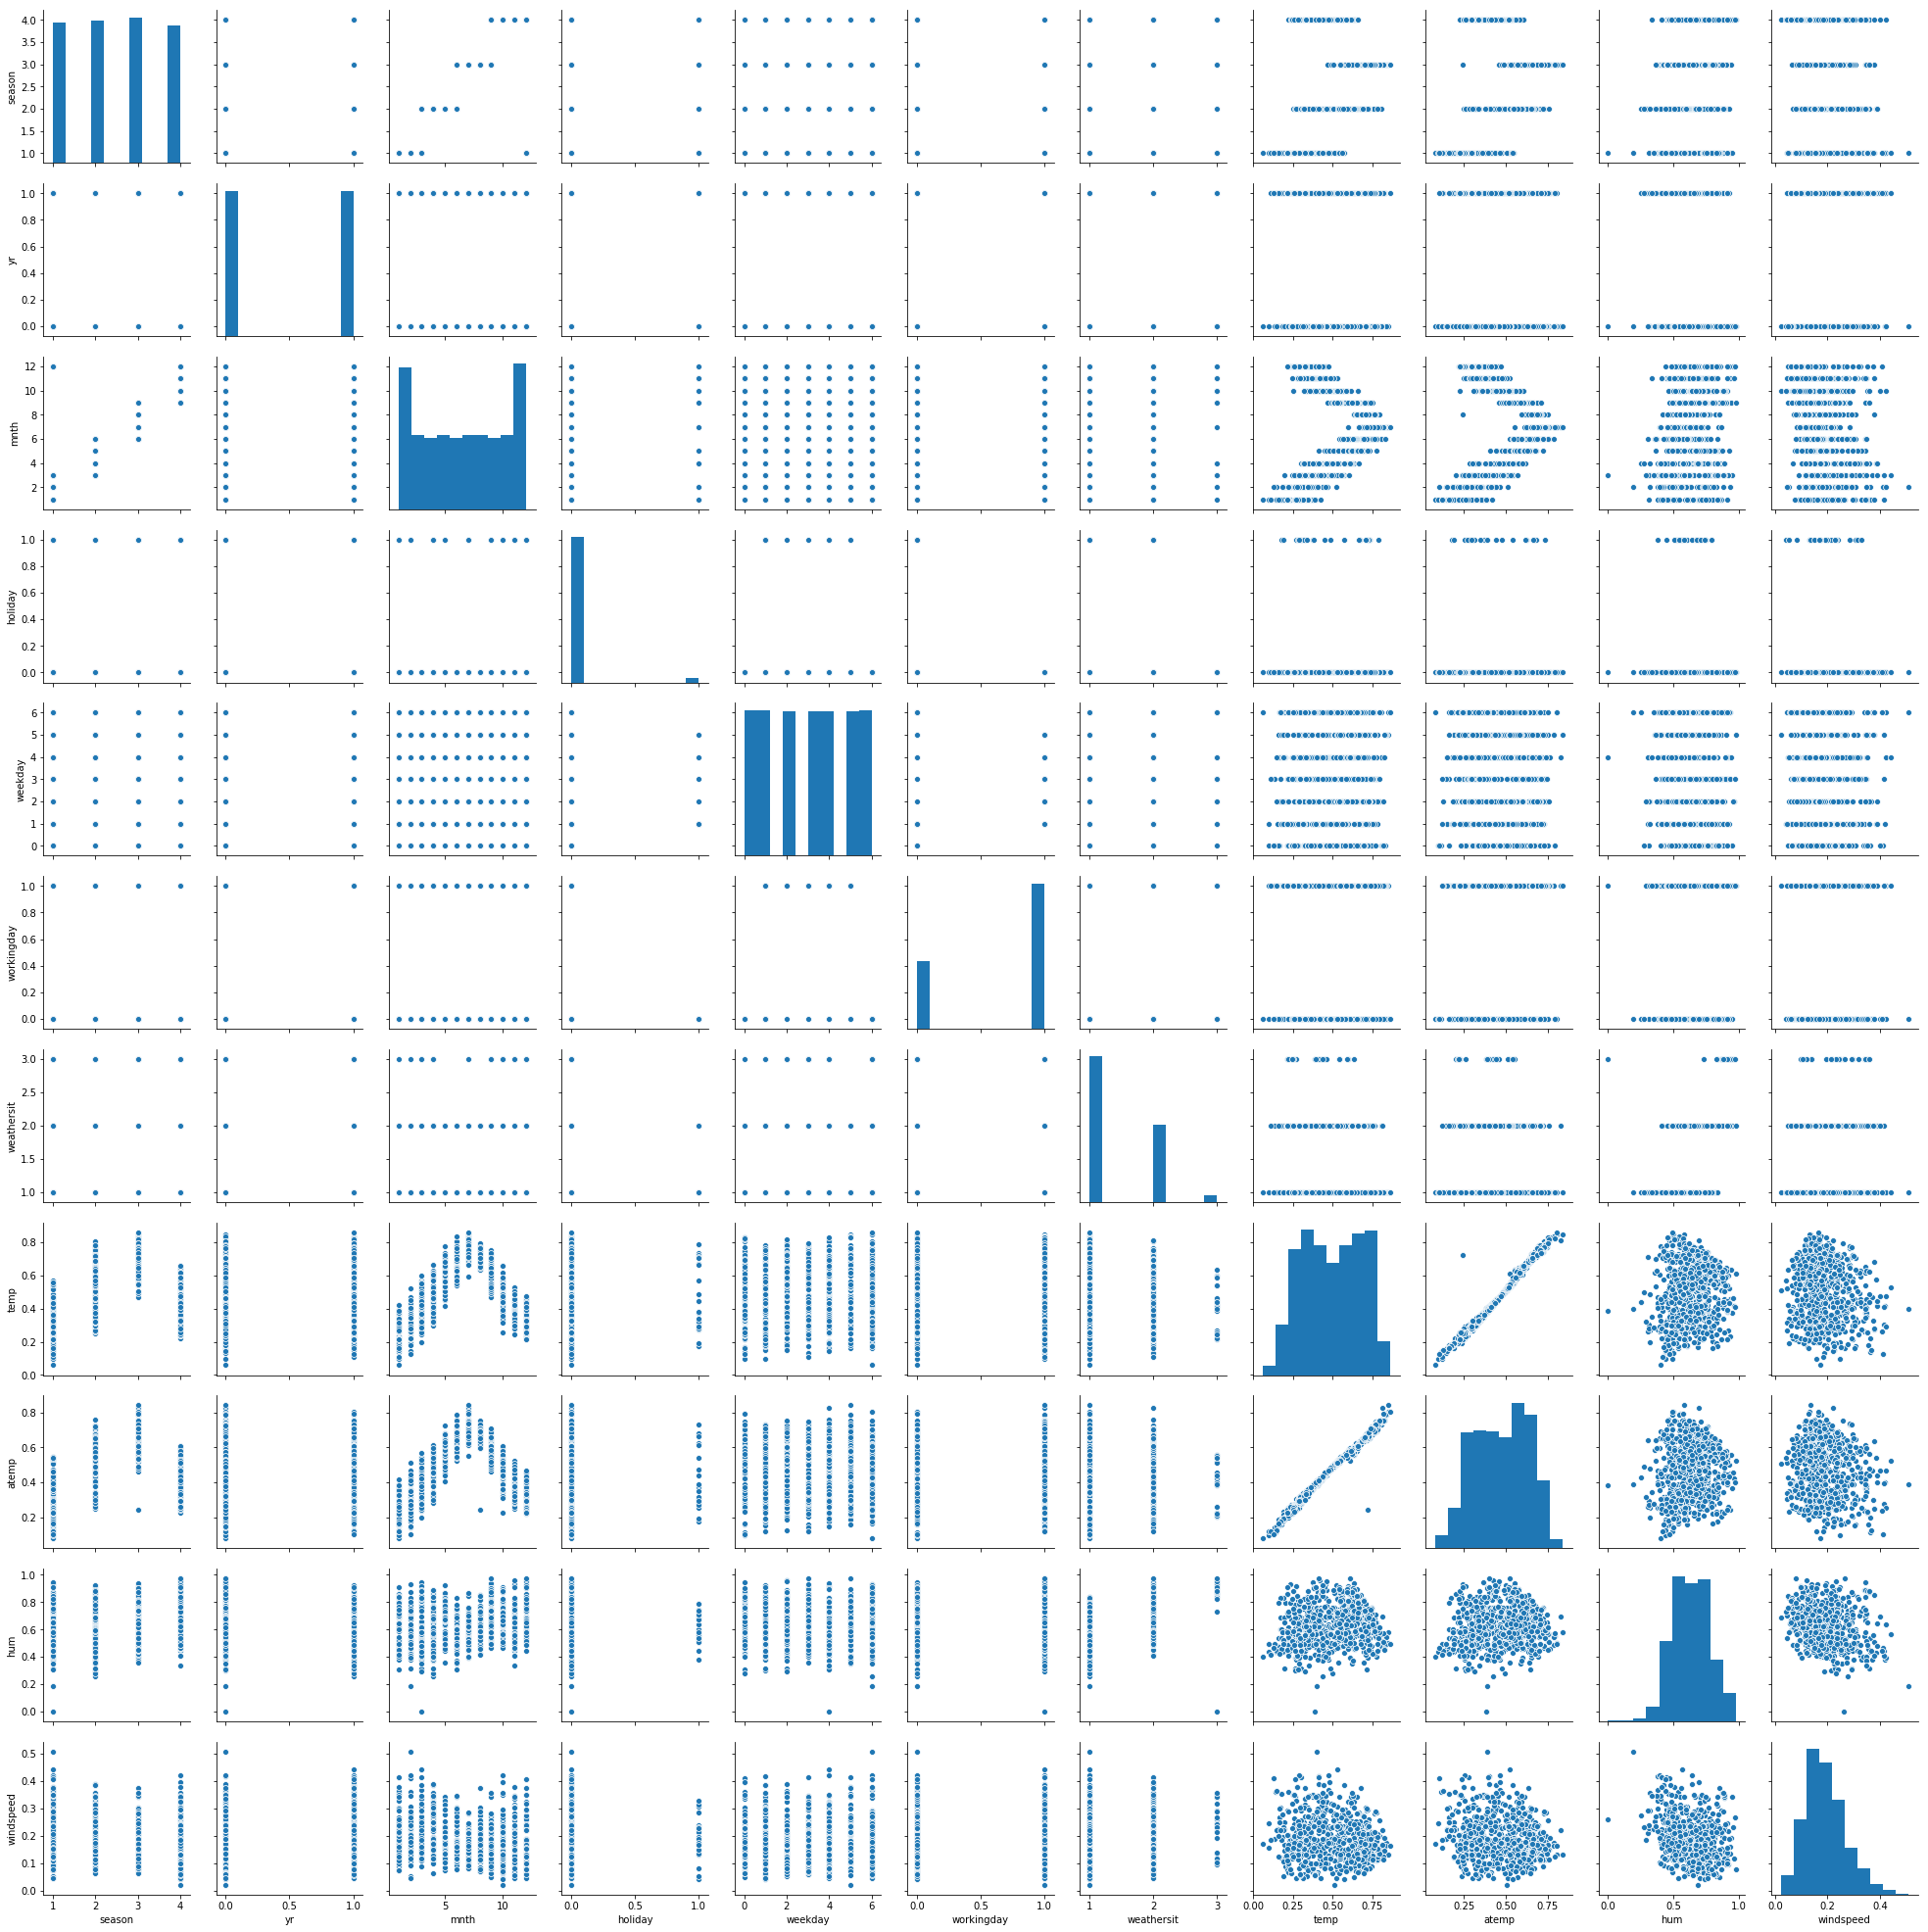

In [2]:
# selecting features using pairwise plots

import seaborn as sns

g = sns.pairplot(X)

### Linear Regression
As you can see from the pairwise plots, there are a few features that correlate well with each other: temperature and atemperature (which makes sense since atemperature is 'adjusted temperature'), season and month, and month and temperature. From the summary of statistics, we have the following confidence in the coefficients:

In [3]:
# calculating R2 for visually correlated features

import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2196.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:57:12   Log-Likelihood:                -5800.8
No. Observations:                 731   AIC:                         1.162e+04
Df Residuals:                     720   BIC:                         1.167e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       466.8466     42.518     10.980      0.000     383.373     550.320
yr          1797.3804     49.798     36.093      0.000    1699.613    1895.148
mnth         -23.9525     13.338     -1.796      0.073     -50.139       2.234
holiday     -168.2019    155.902     -1.079      0.281    -474.279     137.875
weekday       55.9597     12.311      4.545      0.000      31.789      80.130
workingday   993.5865     55.157     18.014      0.000     885.298    1101.875
weathersit  -514.8613     61.065     -8.431      0.000    -634.748    -394.975
temp        -310.5997   1060.075     -0.293      0.770   -2391.808    1770.609
atemp       4157.0675   1187.682      3.500      0.000    1825.333    6488.802
hum          -89.1811    207.312     -0.430      0.667    -496.189     317.827
windspeed   -803.7916    282.080     -2.850      0.005   -1357.589    -249.994
==============================================================================
Omnibus:                      193.256   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.039
Skew:                          -1.239   Prob(JB):                    4.25e-142
Kurtosis:                       6.903   Cond. No.                         536.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Residual Plot of Model')

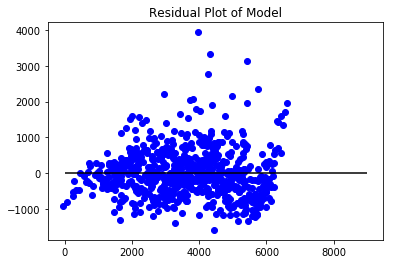

In [4]:
plt.scatter(lin_reg.predict(X), lin_reg.predict(X) - y, c='b')
plt.hlines(y=0, xmin=0, xmax=9000)
plt.title('Residual Plot of Model')

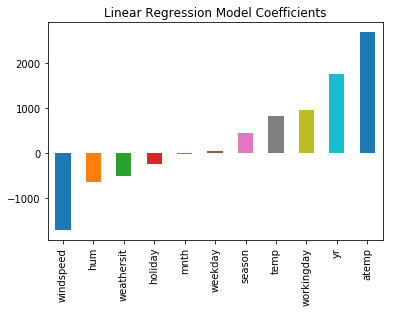

In [5]:
# graphing coefficients

predictors = X.columns
coef = pd.Series(lin_reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Linear Regression Model Coefficients')

[ 35.4839613   33.25493127  57.23291115  -2.063893     9.93638716
  15.86244084 -16.16971681  10.42590091   9.34018762  -1.93832279
  -1.63052362]


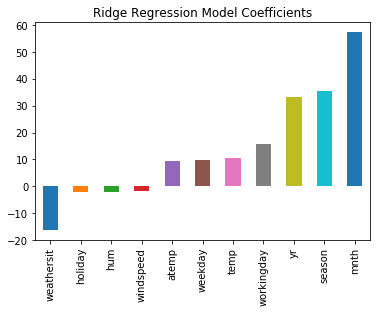

In [6]:
# selecting features using ridge regression

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10000, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.coef_)

# graphing coefficients

predictors = X.columns
coef = pd.Series(ridge_reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Ridge Regression Model Coefficients')

### Ridge

Running ridge regression and increasing the tuning parameter (lambda, or in the case of sklearn, alpha), we see holidy, humidity, and windspeed decreasing towards 0. Starting with alpha=1, the smallest coefficient is -23.95618178. Increase alpha too much, and we see most of the coefficients head towards 0; increase it too little, and we can't tell which features should actually be removed. Setting a threshold of less than magnitude 5, and an alpha of 10,000, we see holidy, humidity, and windspeed coefficients decreasing towards 0 and will eliminate them. We remove these 3 features and create a new regression model.

In [7]:
ridge_X = X.copy()
ridge_X.drop(columns=['holiday', 'hum', 'windspeed'], inplace=True, axis=1)

ridge_model = sm.OLS(y, ridge_X).fit()
ridge_predictions = ridge_model.predict(ridge_X) # make the predictions by the model

# Print out the statistics
ridge_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2987.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:57:13   Log-Likelihood:                -5806.1
No. Observations:                 731   AIC:                         1.163e+04
Df Residuals:                     723   BIC:                         1.167e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       466.4906     42.671     10.932      0.000     382.717     550.264
yr          1778.9735     49.703     35.792      0.000    1681.395    1876.552
mnth         -24.6424     13.307     -1.852      0.064     -50.768       1.483
weekday       50.1104     12.137      4.129      0.000      26.283      73.938
workingday   986.7678     53.450     18.462      0.000     881.833    1091.703
weathersit  -583.8992     39.573    -14.755      0.000    -661.590    -506.208
temp        -155.0489   1035.230     -0.150      0.881   -2187.465    1877.367
atemp       3845.7297   1139.582      3.375      0.001    1608.444    6083.016
==============================================================================
Omnibus:                      180.809   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.889
Skew:                          -1.163   Prob(JB):                    8.97e-131
Kurtosis:                       6.775   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 441.1523257  1617.68155536   -0.           -0.           34.12522723
  793.9548367  -508.60838473 1863.78753719    0.           -0.
   -0.        ]


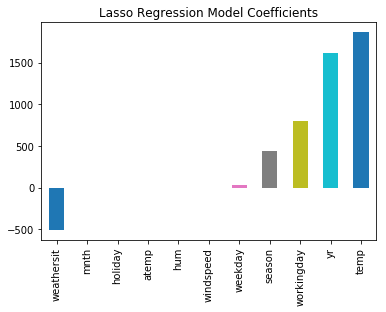

In [8]:
# selecting features using lasso regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=45)
lasso_reg.fit(X, y)
print(lasso_reg.coef_)

# graphing coefficients

predictors = X.columns
coef = pd.Series(lasso_reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Lasso Regression Model Coefficients')

### Lasso

Lasso works best when some features in the initial model are irrelevant. When we run lasso and start increasing the lambda, we see a few features have their coefficients go to 0: month, holiday, atemp, humidity, and windspeed. We remove these 5 features and create a new regression model without them.

In [9]:
lasso_X = X.copy()
lasso_X.drop(columns=['mnth', 'holiday', 'atemp', 'hum', 'windspeed'], inplace=True, axis=1)

lasso_model = sm.OLS(y, lasso_X).fit()
lasso_predictions = lasso_model.predict(lasso_X) # make the predictions by the model

# Print out the statistics
lasso_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3911.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:57:13   Log-Likelihood:                -5813.5
No. Observations:                 731   AIC:                         1.164e+04
Df Residuals:                     725   BIC:                         1.167e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       415.8764     23.580     17.636      0.000     369.582     462.171
yr          1789.4198     50.009     35.782      0.000    1691.240    1887.600
weekday       51.4608     12.220      4.211      0.000      27.469      75.452
workingday  1004.4038     53.702     18.703      0.000     898.974    1109.834
weathersit  -559.5500     38.862    -14.398      0.000    -635.846    -483.254
temp        3334.3990    131.112     25.432      0.000    3076.995    3591.803
==============================================================================
Omnibus:                      179.116   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.372
Skew:                          -1.167   Prob(JB):                    3.80e-124
Kurtosis:                       6.635   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussion

Even with Ridge and Lasso helping us eliminate features, the R^2 value of the model doesn't change. 

I selected the number of registered bike share users as the response variable in the model, as it is a more accurate picture of the typical number of bikers on a given day. For Los Angeles specifically, there are a few interesting things to discuss. First, lets make predictions for peak demand and lowest demand days in LA. 

In [10]:
print(y.sort_values())

newData = pd.DataFrame({
    'season': [1, 4],
    'yr': [0, 0],
    'mnth': [4, 6],
    'holiday': [0, 1],
    'weekday': [2, 3],
    'workingday': [1, 1],
    'weathersit': [1, 4],
    'temp': [0.72, 0.46],
    'atemp': [0.72, 0.46],
    'hum': [0.4, 0.78],
    'windspeed': [0.1, 0.361950]
})

y_predict = lin_reg.predict(newData)
print(y_predict)

instant
668      20
27      416
726     432
359     451
26      472
65      491
302     570
725     573
69      577
1       654
341     655
2       670
106     674
18      674
724     746
9       768
23      836
358     856
17      883
360     887
22      888
239     889
8       891
36      905
478     907
52      912
328     935
16      953
30      956
29      975
       ... 
502    6433
633    6435
643    6437
571    6452
524    6456
616    6459
656    6482
664    6484
657    6501
579    6506
607    6520
608    6541
655    6612
662    6625
623    6630
644    6640
636    6642
634    6693
620    6697
650    6736
622    6750
629    6781
572    6790
628    6803
621    6820
642    6844
663    6898
649    6911
630    6917
635    6946
Name: registered, Length: 731, dtype: int64
[3768.47854887 1774.84180837]


We can see that on an ideal spring day in Los Angeles, with great weather that isn't too hot, a slight breeze, moderate humidity, and a work day (which will have more people commuting, and in turn, using the bike share), an estimated 3,768 people would use the bike share. 

However, on a cold holiday with heavy rain and winds, only about 1,773 people would use the bike share.


#### Conclusion 
Based on the model created from D.C. data, we could see almost 4,000 LA residents utilizing the bike share system on a good day in LA, of which there are many each year. This city could certainly benefit, as any initiative that takes some cars off the road would help traffic and congestion. 

However, I don't think that this model is totally convincing. Sure, the number of estimated riders on peak and low demand days should probably be quite a bit higher, thanks to the fact that LA area's more than double the population of the D.C. metro area. But Los Angeles is not a bike-friendly city. California as a whole has nearly twice as many average annual deaths per million residents as D.C. (http://www.governing.com/gov-data/transportation-infrastructure/most-bicycle-cyclist-deaths-per-capita-by-state-data.html), with 113 average annual deaths to D.C.'s 1. Further, LA consistently ranks as the most dangerous city to bike in (https://www.yourlocalsecurity.com/blog/2018/07/03/safest-cities-america-cyclists/, https://www.bicycling.com/news/a22144265/safest-and-most-dangerous-cycling-cities/). The lack of substantial bike lanes combined with careless drivers makes LA an unwelcome city to bikers, which the model doesn't take into account. 

In addition to lower bike safety, LA residents live in a city that is far bigger than D.C. and thus, residents will typically have a longer commute to work. There is also the fact that D.C. is less dense than Los Angeles (https://dc.curbed.com/2017/3/21/15006154/population-density-dc-washington), again indicating that bike riders would have to go further to get to their destinations.

All of these factors that aren't incorporated into the model could drastically reduce the number of participants in the bike share, despite LA's much larger population compared to D.C. However, giving LA residents an opportunity to participate in a bike share system would still provide many benefits. Residents who can't afford cars would suddenly have a cheap and easy way to travel short distances. There are also the obvious health benefits of riding bikes consistently, as well as the reduction in vehicles on the roads which would help LA's notorious traffic. While there may not be as large as an impact as the model suggests, a bike share program would be wonderful for LA.
